In [0]:
import pandas as pd
import numpy as np
train_data = pd.read_csv(r'https://raw.githubusercontent.com/mayankkumar2/toxicComment/master/train.csv')
test_data = pd.read_csv(r'https://raw.githubusercontent.com/mayankkumar2/toxicComment/master/test.csv')
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


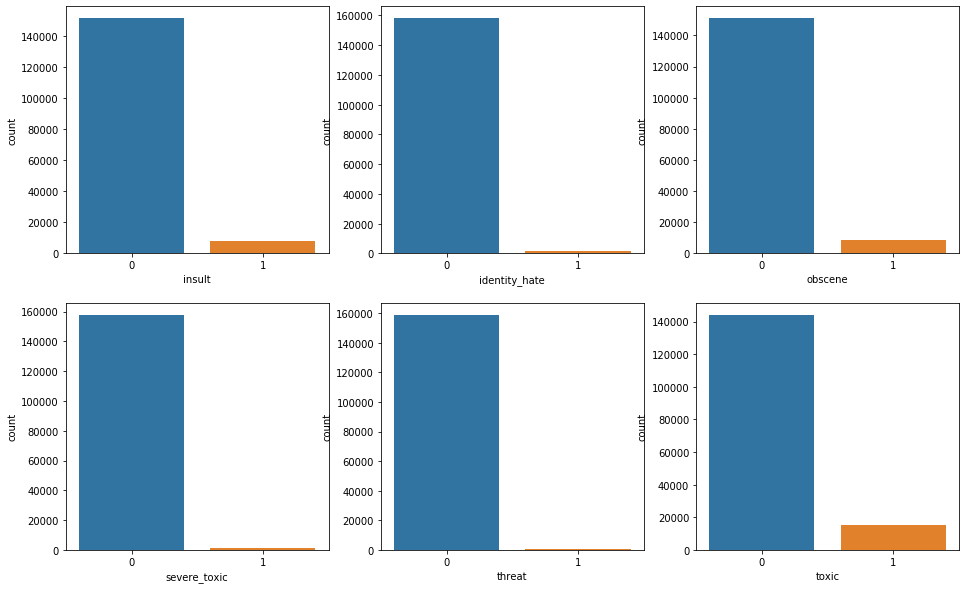

In [0]:
import matplotlib.pyplot as plt
import seaborn 
ig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
seaborn.countplot(train_data['insult'],ax = ax1)
seaborn.countplot(train_data['identity_hate'], ax=ax2)
seaborn.countplot(train_data['obscene'],ax=ax3)
seaborn.countplot(train_data['severe_toxic'],ax=ax4)
seaborn.countplot(train_data['threat'],ax=ax5)
seaborn.countplot(train_data['toxic'],ax=ax6)

In [0]:
_len = train_data.comment_text.str.len()
_len.mean(), _len.std(), _len.max()

(394.0732213246768, 590.7202819048923, 5000)

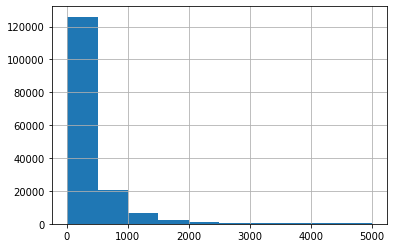

In [0]:
_len.hist()
del _len

In [0]:
train_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [0]:
#counting null values in test data
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

In [0]:
import gc
gc.collect()

3073

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
wordVector = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
charVector = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',stop_words= 'english',ngram_range=(3,6),dtype=np.float32)
train_word = wordVector.fit_transform(train_data['comment_text'])
test_word = wordVector.transform(test_data['comment_text'])
train_char = charVector.fit_transform(train_data['comment_text'])
test_char = charVector.transform(test_data['comment_text'])

In [0]:
from scipy.sparse import hstack
X_train = hstack([train_word, train_char])
X_test = hstack([test_word, test_char])

In [0]:
target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
Y_train = train_data[target_col]
print(Y_train)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]


In [15]:
gc.collect()
from sklearn.linear_model import LogisticRegression
pred = np.zeros((X_test.shape[0],Y_train.shape[1]))
cv_score =[]
for i,col in enumerate(target_col):
    lr = LogisticRegression(C=4,class_weight = 'balanced')
    print('Building model for column:' ,col) 
    lr.fit(X_train,Y_train[col])
    pred[:,i] = lr.predict_proba(X_test)[:,1]

Building model for column: toxic


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Building model for column: severe_toxic
Building model for column: obscene
Building model for column: threat
Building model for column: insult
Building model for column: identity_hate


In [16]:
predict = pd.DataFrame(pred,columns=Y_train.columns)
sub = pd.concat([test_data['id'],predict],axis=1)
sub.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1.000000,0.791770,1.000000,0.352635,0.999583,0.982723
1,0000247867823ef7,0.002769,0.000253,0.000181,0.000079,0.004001,0.002612
2,00013b17ad220c46,0.015704,0.002022,0.056762,0.000058,0.008515,0.003368
3,00017563c3f7919a,0.002581,0.005814,0.001074,0.000425,0.001291,0.000096
4,00017695ad8997eb,0.010732,0.001308,0.003630,0.000548,0.009448,0.000212


In [0]:
sub.to_csv('submission.csv', index=False)